# Definição do agente do jogo Pacman

Baseamos nossa escolha de agente como um pacman que decide o próximo passo a ser dado ao analisar em seu estado atual qual a posição de todos os fantasmas, do fantasma mais próximo, das comidas dentro de um raio e da comida mais próxima.

In [1]:
from pacman import GameState,readCommand
from collections import Counter
from game import Agent
from game import Directions
from util import manhattanDistance
from heuristic import heuristicDistance
import seaborn as sns
import pacman
import random
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
class theBestAgentOnEarth(Agent):
    '''O melhor agente da Terra que recebe pesos para a relevância de funções de busca, como
    a posição da melhor comida, do fantasma mais próximo, etc, para calcular o próximo passo do Agente'''
    
    def __init__(self,weights):
        self.weights = weights
        
    def registerInitialState(self, state):
        return    
    
    
    
    def getAction(self,state):
        
        def dirComida(state,weight1,weight2,lado_quadrado):
            '''Função que recebe dois pesos e um número. Ela verifica por comida num quadrado em torno do pacman.
            A função recebe o tamanho do lado do quadrado. Ela retorna a direção em que mais comidas estão nesse
            quadrado (Oeste,Leste,Norte, Sul), ponderada pelo peso 1 e a direção da comida mais próxima ponderada
            pelo peso 2.'''
            east=west=north=south=0 #inicializando as variaveis para contar as direções mais frequentes
            best_east=best_west=best_north=best_south=0 #inicializando as variaveis para as direções
                                                        #da comida mais próxima
            near_x=near_y=0
            near_food=10000
            #Cria o quadrado ladoxlado em volta do pacman para checar se tem comida e qual a direção da comida
            for eixo_x in range(int(-(lado_quadrado/2)),int((lado_quadrado/2)+1)):
                for eixo_y in range(int(-(lado_quadrado/2)),int((lado_quadrado/2)+1)):
                    try:
                        #Se tem muro, vai para outro quadrado
                        if state.hasWall(state.getPacmanPosition()[0]+eixo_x,state.getPacmanPosition()[1]+eixo_y):
                            continue
                        else:
                            #Se não tem muro, atualiza o x e y do quadrado
                            x = state.getPacmanPosition()[0]+eixo_x
                            y = state.getPacmanPosition()[1]+eixo_y
                            has_food = state.getFood()[x][y]
                            #Verifica se tem comida no quadrado e adiciona a direção mais forte(sul,norte,leste,oeste)
                            if has_food:
                                #Ve se é a comida mais proxima, se for irá armazenar as direções para o weight 2
                                #Utilizamos a distância de Manhattan pra ver qual comida é a mais próxima
                                dist=manhattanDistance(state.getPacmanPosition(),[x,y])
                                if dist<near_food:
                                    near_food=dist
                                    near_x= x
                                    near_y= y
                                    #Aqui vereficamos o maior eixo e o sinal. Se for,por exemplo, eixo x e sinal 
                                    #positivo, será direção oeste. Se for o mesmo eixo e sinal contrário, será 
                                    #direção este. Do mesmo modo se o eixo y for o maior, será norte se for
                                    #positivo e sul se for negativo
                                    if abs(eixo_x)>abs(eixo_y) and eixo_x<0:
                                        best_west = 0
                                        best_west += 1
                                    elif abs(eixo_x)>abs(eixo_y) and eixo_x>0:
                                        best_east=0
                                        best_east += 1
                                    elif abs(eixo_y)>abs(eixo_x) and eixo_y<0:
                                        best_south=0
                                        best_south += 1
                                    elif abs(eixo_y)>abs(eixo_x) and eixo_y>0:
                                        best_north=0
                                        best_north += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x>0:
                                        best_north=best_east=0
                                        best_north += 1
                                        best_east += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x<0:
                                        best_north=best_west=0
                                        best_north += 1
                                        best_west += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x>0:
                                        best_south=best_east=0
                                        best_south += 1
                                        best_east += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x<0:
                                        best_south=best_west=0
                                        best_south += 1
                                        best_west += 1
                                #Depois de vermos se é a comida mais próxima, agora checamos a mesma coisa para
                                #as demais comidas. Mesmo se for a comida mais próxima, ela entrará na conta da
                                #comida total.
                                if abs(eixo_x)>abs(eixo_y) and eixo_x<0:
                                    west += 1
                                elif abs(eixo_x)>abs(eixo_y) and eixo_x>0:
                                    east += 1
                                elif abs(eixo_y)>abs(eixo_x) and eixo_y<0:
                                    south += 1
                                elif abs(eixo_y)>abs(eixo_x) and eixo_y>0:
                                    north += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x>0:
                                    north += 1
                                    east += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x<0:
                                    north += 1
                                    west += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x>0:
                                    south += 1
                                    east += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x<0:
                                    south += 1
                                    west += 1                            
                    except:
                        continue
                        
            #Agora que fizemos a contagem das direções, a função retorna
            #dois dicionários, um para a comida mais próxima e outro para o total de comidas.
            # Cada dicionário contém todas as direções como keys e a contagem das direções, já ponderada
            #pelo reespectivos pesos, 1 e 2 (Peso 1 para a comida total e peso 2 para a comida mais próxima).
            actions_count_all={'East':weight1*east,'West':weight1*west,'North':weight1*north,'South':weight1*south}
            
            actions_count_near={'East':weight2*best_east,'West':weight2*best_west,
                                'North':weight2*best_north,'South':weight2*best_south}
            return actions_count_all , actions_count_near
        
        def futureBestState(state,legal,weight):
            dic = {'East':0,'West':0,'North':0,'South':0}
            score_list = [0,0,0,0]
            for action in dic.keys():
                if action in legal:
                    score = state.generatePacmanSuccessor(action).getScore()
                    dic[action]=score*weight
            return dic
        def dirNearGhost(state,weight):
            '''Função que recebe um peso, verifica pelo fantasma mais perto e retorna direção oposta ponderada
            pelo peso recebido.'''
            
            east=west=north=south=0 #inicializando as variaveis para contar as direções mais frequentes
            numGhost = state.getNumAgents() #Número de fantasmas
            near_dist = 10000 #Estabelecendo um valor de distância alto para ser substituido
            #função que busca o fantasma mais perto, baseado na distância de manhattan
            for ghost in range(1,numGhost):
                dist=manhattanDistance(state.getPacmanPosition(),state.getGhostPosition(ghost))
                if dist<near_dist:
                    near_dist=dist
                    near_ghost=ghost
            #Selecionamos agora a direção do fantasma mais proximo
            x,y=heuristicDistance(state.getPacmanPosition(),state.getGhostPosition(near_ghost))
            #Aqui inevertemos a melhor direção, para o pacman ir para uma direção oposta do fantasma
            if abs(x)>abs(y):
                if x>0:
                    east += 1
                else:
                    west += 1
                    
            elif abs(x)==abs(y):
                if x>0:
                    east += 1
                    north += 1
                else:
                    west += 1
                    south += 1
            else:
                if y>0:
                        north += 1
                else:
                        south += 1
            #Retornamos um dicionário com todas as direções como key e a contagem, já ponderada pelo peso,
            #como values                         
            actions_count={'East':weight*east,'West':weight*west,'North':weight*north,'South':weight*south}
            return actions_count
         
        def dirAllGhost(state,weight):
            '''Função que recebe um peso, verifica os fantasmas e retorna a direção oposta da somatória dos fantasmas
            ponderada pelo peso passado na função.'''
           
            east=west=north=south=0 #inicializando as variaveis para contar as direções mais frequentes
            numGhost = state.getNumAgents() #Número de fantasmas. Sabemos que o pacman é contado aqui, mas não importa
                                            # porque na função range() utilizada abaixo começamos no 1, e não no zero

            for ghost in range(1,numGhost):
                x,y=heuristicDistance(state.getPacmanPosition(),state.getGhostPosition(ghost))
                #Aqui inevertemos a melhor direção, para o pacman ir para uma direção oposta ao do fantasma
                if abs(x)>abs(y):
                    if x>0:
                        east += 1
                    else:
                        west += 1
                    
                elif abs(x)==abs(y):
                    if x>0:
                        east += 1
                        north += 1
                    else:
                        west += 1
                        south += 1
                else:
                    if y>0:
                        north += 1
                    else:
                        south += 1
            #Retornamos um dicionário com todas as direções como key e a contagem, já ponderada pelo peso,
            #como values            
            actions_count={'East':weight*east,'West':weight*west,'North':weight*north,'South':weight*south}
            return actions_count
        
        #Agora iniciamos a função getAction, retirando um dos cromossomos do indivíduo (cada
        #passo dado pelo indivíduo no jogo, ponderada pelos pesos). Ou seja, o gene contém a lista de pesos
        #para cada uma das funções estabelecidas: peso 1 dado para a melhor direção para comidas, peso dois 
        #para a melhor direção para comida mais próxima, peso três para a direção oposta
        # de todos os fantasmas e direção oposta do fantasma mais próximo.
        try:
            gene=self.weights.pop(0) #Retira um gene da lista de passos
        except:
            return Directions.STOP
        legal = state.getLegalPacmanActions() #Verifica as ações legais do agente
        tentativas=0 #Inicializa a variável de tentativas para achar a melhor direção dado os pesos
        lado_quadrado=2 #Inicializa o tamanho do lado do quadrado do pacman para a busca da comida
        food = state.getNumFood()
        while tentativas<15 and food > 10:#Tenta 15 vezes encontrar alguma direção ou ate faltar 10 comidas
            tentativas+=1 #Vamos contando o número de tentativas
            lado_quadrado+=2 #A cada tentativa, aumentamos o quadrado de busca por comida
            #Vemos o dicionário de ações para a melhor comida e para todas as comidas
            all_food_best_dir, near_food_best_dir = dirComida(state,int(gene[0]),int(gene[1]),lado_quadrado)
            #Vemos o dicionário de ações para o fantasma mais próximo e todos os fantasmas
            all_ghost_best_dir = dirAllGhost(state,int(gene[2]))
            near_ghost_best_dir = dirNearGhost(state,int(gene[3]))
            best_future_action = futureBestState(state,legal,int(gene[4]))
            final = dict(Counter(all_food_best_dir) + Counter(near_food_best_dir) + 
                     Counter(all_ghost_best_dir)+
                     Counter(near_ghost_best_dir)+
                     Counter(best_future_action))
            final = dict(sorted(final.items(), key=lambda item: item[1],reverse=True))
            for i in range(len(final)):
                melhor_direcao = list(final.keys())[i]
                if melhor_direcao in legal:
                    return melhor_direcao
        #Se nenhuma dessas tentativas derem certo, para evitar erro, retornamos uma direção aleatória dentre
        # as direções legais dos agentes
        all_food_best_dir, near_food_best_dir = dirComida(state,int(gene[0]),int(gene[1]),lado_quadrado)
        best_future_action = futureBestState(state,legal,int(gene[4]))
        final = dict(Counter(near_food_best_dir) + Counter(best_future_action))
        final = dict(sorted(final.items(), key=lambda item: item[1],reverse=True))
        for i in range(len(final)):
            melhor_direcao = list(final.keys())[i]
            if melhor_direcao in legal:
                return melhor_direcao
        final = dict(sorted(near_food_best_dir.items(), key=lambda item: item[1],reverse=True))
        if list(final.keys())[0] in legal:
            return list(final.keys())[0]
        return random.choice(legal)

In [2]:
def generateGene():
    '''Função que retorna um gene. Ela gera uma lista com 5 números de 0 a 100 criados aleatoriamente'''
    gene=[]
    for weight in range(0,5):
        gene.append(random.uniform(0, 100))
    return gene
def generateIndividuo():
    '''Função que retorna um indivíduo. Ela gera um indivíduo com 2000 passos, valor suficiente para resolver
    até o layout mais complexo do pacman.'''
    individuo=[]
    for jogadas in range(0,1000):
        individuo.append(generateGene())
    return individuo
def generatePopulation(size):
    '''Função que recebe o layout do jogo e um tamanho e cria uma população de indivíduos. Ela
    retorna duas listas, a população e os scores de cada indivíduo. O score na posição 0 da lista será do 
    indivíduo da população na posição 0.'''
    population=[]
    for i in range(0,size):
        individuo = generateIndividuo()
        individuo_temp=individuo #Passamos para uma variável temporária pois o .pop(0)do getAction
                                    #remove os passos dados dos indivíduos
        population.append(individuo)
    return population

def pacmanAvarageScore(individuo,num_tentativas,flag):
    '''Função que recebe o indivíduo, a quantidade de jogos que ele irá realizar e o layout do jogo.
    Ela retorna o score médio da quantidade de jogos realizados para esse indivíduo.'''
    tentativas_ind=[]
    layouts=['smallClassic']
    for layout in layouts:
        for tentativas in range(0,num_tentativas):
            if flag:
                args = ['--layout',layout,'--pacman','DumbAgent','-q']
            else:
                args = ['--layout',layout,'--pacman','DumbAgent']
            args_list = readCommand(args)
            test = theBestAgentOnEarth(individuo)
            score= pacman.runGames(pacman=test,layout=args_list['layout'],ghosts=args_list['ghosts'],display=args_list['display'],
                           numGames=args_list['numGames'],record=args_list['record'])
            tentativas_ind.append(score)
    return np.mean(tentativas_ind)

def evaluatePopulation(population,flag):
    '''Função que recebe o layout do jogo e um tamanho e cria uma população de indivíduos. Ela
    retorna duas listas, a população e os scores de cada indivíduo. O score na posição 0 da lista será do 
    indivíduo da população na posição 0.'''
    scores=[]
    for i in range(0,len(population)):
        print('individuo ',i+1)
        individuo = population[i]
        individuo_temp=deepcopy(individuo) #Passamos para uma variável temporária pois o .pop(0)do getAction
                                    #remove os passos dados dos indivíduos
        avg_score = pacmanAvarageScore(individuo_temp,5,flag)
        scores.append(avg_score)
    return scores

def mutation(population,rate):
    '''Função que recebe uma população e uma taxa e define uma porcentagem da população para realizar mutação
    de cromossomos nos seus indivíduos da essa taxa recebida'''
    for selected in range(int(len(population)*rate)): #Seleciona uma quantidade x de indivíduos, dado a rate
        position_individual = random.randint(0,len(population)-1) #seleciona um indivíduo aleatório na população
        position_cromossom1 = random.randint(0,len(population[position_individual])-1)#Seleciona um cromossomo aleatório
        position_cromossom2 = random.randint(0,len(population[position_individual])-1)#Seleciona outro cromossomo aleatório
        crom1 = population[position_individual][position_cromossom1]
        crom2 = population[position_individual][position_cromossom2]
        
        population[position_individual][position_cromossom1] = crom2
        population[position_individual][position_cromossom2] = crom1
    return population
        
def crossover(pairs,range_cromossomos,aleatorio):
    '''Função que recebe um pair [score, população] e uma taxa e um range de valores e define uma porcentagem da população
    para realizar crossover desse range de valores (recebido pela função) para os cromossomos dos indivíduos'''
    
    for selected in range(len(pairs)): #Seleciona um individuo de vez da pop
        
        position_individual1 = random.randint(0,len(pairs)-1) #seleciona um indivíduo 1 aleatório na população
        position_individual2 = random.randint(0,len(pairs)-1) #seleciona um indivíduo 2 aleatório na população
        #Se a posicao dos indivíduos são iguais, entra num while para trocar a posicao2 
        while position_individual1 == position_individual2:
            position_individual2 = random.randint(0,len(pairs)-1) #seleciona um indivíduo 2 aleatório na população
        #Apos selecionar as posições dos indivíduos, selecionamos o range de seus primeiros cromossomos     
        crom1_list = pairs[position_individual1][1][aleatorio:aleatorio+range_cromossomos]
        crom2_list = pairs[position_individual2][1][aleatorio:aleatorio+range_cromossomos]
            
        pairs[position_individual1][1][aleatorio:aleatorio+range_cromossomos] = crom2_list
        pairs[position_individual2][1][aleatorio:aleatorio+range_cromossomos] = crom1_list
    population = [el[1] for el in pairs]
    return population

def makePairs(scores,population):
    lista=[]
    for i in range(len(population)):
        item=[scores[i], population[i]]
        lista.append(item)
    lista.sort(reverse=True, key=lambda li: li[0])
    return lista

def mergePopulationAndScores(pairs,pairs_linha):
    pop = pairs[:5] + pairs_linha[:-5]
    population = [el[1] for el in pop]
    scores = [el[0] for el in pop]
    return population, scores

# Funções para o algoritmo genético

In [2]:
def generateGene():
    '''Função que retorna um gene. Ela gera uma lista com 5 números de 0 a 100 criados aleatoriamente'''
    gene=[]
    for weight in range(0,5):
        gene.append(random.uniform(0, 100))
    return gene
def generateIndividuo():
    '''Função que retorna um indivíduo. Ela gera um indivíduo com 2000 passos, valor suficiente para resolver
    até o layout mais complexo do pacman.'''
    individuo=[]
    for jogadas in range(0,1000):
        individuo.append(generateGene())
    return individuo
def generatePopulation(size):
    '''Função que recebe o layout do jogo e um tamanho e cria uma população de indivíduos. Ela
    retorna duas listas, a população e os scores de cada indivíduo. O score na posição 0 da lista será do 
    indivíduo da população na posição 0.'''
    population=[]
    for i in range(0,size):
        individuo = generateIndividuo()
        individuo_temp=individuo #Passamos para uma variável temporária pois o .pop(0)do getAction
                                    #remove os passos dados dos indivíduos
        population.append(individuo)
    return population

def pacmanAvarageScore(individuo,num_tentativas,flag):
    '''Função que recebe o indivíduo, a quantidade de jogos que ele irá realizar e o layout do jogo.
    Ela retorna o score médio da quantidade de jogos realizados para esse indivíduo.'''
    tentativas_ind=[]
    layouts=['smallClassic']
    for layout in layouts:
        for tentativas in range(0,num_tentativas):
            if flag:
                args = ['--layout',layout,'--pacman','DumbAgent','-q']
            else:
                args = ['--layout',layout,'--pacman','DumbAgent']
            args_list = readCommand(args)
            test = theBestAgentOnEarth(individuo)
            score= pacman.runGames(pacman=test,layout=args_list['layout'],ghosts=args_list['ghosts'],display=args_list['display'],
                           numGames=args_list['numGames'],record=args_list['record'])
            tentativas_ind.append(score)
    return np.mean(tentativas_ind)

def evaluatePopulation(population,flag):
    '''Função que recebe o layout do jogo e um tamanho e cria uma população de indivíduos. Ela
    retorna duas listas, a população e os scores de cada indivíduo. O score na posição 0 da lista será do 
    indivíduo da população na posição 0.'''
    scores=[]
    for i in range(0,len(population)):
        print('individuo ',i+1)
        individuo = population[i]
        individuo_temp=deepcopy(individuo) #Passamos para uma variável temporária pois o .pop(0)do getAction
                                    #remove os passos dados dos indivíduos
        avg_score = pacmanAvarageScore(individuo_temp,5,flag)
        scores.append(avg_score)
    return scores

def mutation(population,rate):
    '''Função que recebe uma população e uma taxa e define uma porcentagem da população para realizar mutação
    de cromossomos nos seus indivíduos da essa taxa recebida'''
    for selected in range(int(len(population)*rate)): #Seleciona uma quantidade x de indivíduos, dado a rate
        position_individual = random.randint(0,len(population)-1) #seleciona um indivíduo aleatório na população
        position_cromossom1 = random.randint(0,len(population[position_individual])-1)#Seleciona um cromossomo aleatório
        position_cromossom2 = random.randint(0,len(population[position_individual])-1)#Seleciona outro cromossomo aleatório
        crom1 = population[position_individual][position_cromossom1]
        crom2 = population[position_individual][position_cromossom2]
        
        population[position_individual][position_cromossom1] = crom2
        population[position_individual][position_cromossom2] = crom1
    return population
def torneio(pairs,tournment_size):
    participantes_torneio=[]
    for number in range(tournment_size):
        position_individual = random.randint(0,len(pairs)-1)
        individuo = pairs[position_individual]
        participantes_torneio.append(individuo)
    participantes_torneio.sort(reverse=True, key=lambda li: li[0])
    return participantes_torneio[0]
def crossover(pairs,range_cromossomos,aleatorio):
    '''Função que recebe um pair [score, população] e uma taxa e um range de valores e define uma porcentagem da população
    para realizar crossover desse range de valores (recebido pela função) para os cromossomos dos indivíduos'''
    novos_pares=[]
    for i in range(int((len(pairs)*0.8)/2)): #Para 80% dosindivíduos de individuos na populacao
        
        individual1 = torneio(pairs,4) #seleciona um indivíduo 1 aleatório na população
        individual2 = torneio(pairs,4) #seleciona um indivíduo 2 aleatório na população
        #Apos selecionar as posições dos indivíduos, selecionamos o range de seus primeiros cromossomos     
        crom1_list = individual1[1][aleatorio:aleatorio+range_cromossomos]
        crom2_list = individual2[1][aleatorio:aleatorio+range_cromossomos]
            
        individual1[1][aleatorio:aleatorio+range_cromossomos] = crom2_list
        individual2[1][aleatorio:aleatorio+range_cromossomos] = crom1_list
        novos_pares.append(individual1)
        novos_pares.append(individual2)
    population = [el[1] for el in novos_pares]
    return population

def makePairs(scores,population):
    lista=[]
    for i in range(len(population)):
        item=[scores[i], population[i]]
        lista.append(item)
    lista.sort(reverse=True, key=lambda li: li[0])
    return lista

def mergePopulationAndScores(pairs,pairs_linha):
    pop = pairs[:10] + pairs_linha[:-10]
    population = [el[1] for el in pop]
    scores = [el[0] for el in pop]
    return population, scores

# Main

In [ ]:
dic={}
#genetic program procedure
t = 0

# Initialize_Population P(0)
size=20
P = generatePopulation(size)
delta_score = 1
# While not (wall_condition) do
while t <= 300: #delta_score < 0.001 or 
    print('GERAÇÃO',t)
    # Evaluate_Population P(t)
    print('pais:')
    scores = evaluatePopulation(P,flag=True)
    pairs= makePairs(scores,P)
    #Duplicationof the best 25% individuals of P(t)
    pairs_duplication = pairs[:int(len(pairs)*0.2)]
    Pduplication = [el[1] for el in pairs_duplication]
    # P_cross = crossover 80% de P(t) de 100 primeiros genes
    aleatorio = np.random.randint(0,600)
    Pcrossover = crossover(pairs,100,aleatorio)
    #P'(t) = duplication + cross
    
    Plinha = Pcrossover + Pduplication
    
    Plinha = mutation(Plinha,0.1)
    # Evaluate_Population P’
    print('filhos:')
    scores_linha  = evaluatePopulation(Plinha,flag=True)
    pairs_linha = makePairs(scores_linha,Plinha)
    
    # P(t+1) = Select_s survivors P(t) from P '
    P, scores_final = mergePopulationAndScores(pairs,pairs_linha)
    dic[t] = scores_final
    t = t + 1
#End

GERAÇÃO 0
pais:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 831
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
Pacman emerges victorious! Score: 1303
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
Pacman emerges victorious! Score: 997
individuo  16
individuo  17
Pacman emerges victorious! Score: 899
Pacman emerges victorious! Score: 843
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 931
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
Pacman emerges victorious! Score: 1485
individuo  20
GERAÇÃO 1
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
Pacman emerges victorious! Score: 861
individuo  8
individu

individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
Pacman emerges victorious! Score: 867
individuo  18
individuo  19
Pacman emerges victorious! Score: 877
individuo  20
GERAÇÃO 11
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
Pacman emerges victorious! Score: 1119
individuo  7
individuo  8
Pacman emerges victorious! Score: 907
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
Pacman emerges victorious! Score: 859
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
Pacman emerges victorious! Score: 1151
individuo  5
individuo  6
Pacman emerges victorious! Score: 948
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
Pacman emerges victorious! Score: 945
individuo  14
Pacman emerges victorious! Scor

individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
Pacman emerges victorious! Score: 917
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 803
GERAÇÃO 21
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
Pacman emerges victorious! Score: 821
individuo  9
individuo  10
individuo  11
individuo  12
Pacman emerges victorious! Score: 975
individuo  13
individuo  14
Pacman emerges victorious! Score: 909
Pacman emerges victorious! Score: 1092
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
Pacman emerges victorious! Score: 965
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 908
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 22
pais:

Pacman emerges victorious! Score: 1492
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
Pacman emerges victorious! Score: 970
individuo  12
individuo  13
Pacman emerges victorious! Score: 1085
individuo  14
individuo  15
individuo  16
Pacman emerges victorious! Score: 1065
Pacman emerges victorious! Score: 911
individuo  17
individuo  18
individuo  19
Pacman emerges victorious! Score: 859
individuo  20
Pacman emerges victorious! Score: 1088
GERAÇÃO 31
pais:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 1051
individuo  4
individuo  5
individuo  6
Pacman emerges victorious! Score: 915
individuo  7
Pacman emerges victorious! Score: 943
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
Pacman emerges victorious! Score: 917
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 975
filhos:
individuo  1
individuo  

individuo  14
individuo  15
Pacman emerges victorious! Score: 924
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 1162
Pacman emerges victorious! Score: 933
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
Pacman emerges victorious! Score: 871
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
Pacman emerges victorious! Score: 977
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 41
pais:
individuo  1
individuo  2
Pacman emerges victorious! Score: 913
individuo  3
individuo  4
Pacman emerges victorious! Score: 953
individuo  5
Pacman emerges victorious! Score: 899
individuo  6
individuo  7
Pacman emerges victorious! Score: 841
Pacman emerges victorious! Score: 1107
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
Pacman emerges victorious! Score: 756
individuo  14

individuo  7
individuo  8
Pacman emerges victorious! Score: 973
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
Pacman emerges victorious! Score: 989
individuo  15
individuo  16
individuo  17
individuo  18
Pacman emerges victorious! Score: 899
individuo  19
individuo  20
GERAÇÃO 51
pais:
individuo  1
Pacman emerges victorious! Score: 1101
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
Pacman emerges victorious! Score: 978
individuo  12
individuo  13
individuo  14
Pacman emerges victorious! Score: 967
individuo  15
Pacman emerges victorious! Score: 1101
Pacman emerges victorious! Score: 955
Pacman emerges victorious! Score: 1045
individuo  16
individuo  17
Pacman emerges victorious! Score: 1047
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 889
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  

individuo  19
individuo  20
filhos:
individuo  1
individuo  2
Pacman emerges victorious! Score: 941
individuo  3
individuo  4
individuo  5
individuo  6
Pacman emerges victorious! Score: 1057
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
Pacman emerges victorious! Score: 1325
individuo  12
individuo  13
Pacman emerges victorious! Score: 951
individuo  14
Pacman emerges victorious! Score: 959
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 61
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
Pacman emerges victorious! Score: 969
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 985
filhos:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 923
individuo  4
Pacman emerges victorious! Score: 977
i

individuo  16
individuo  17
Pacman emerges victorious! Score: 907
individuo  18
Pacman emerges victorious! Score: 1338
individuo  19
individuo  20
GERAÇÃO 70
pais:
individuo  1
individuo  2
Pacman emerges victorious! Score: 983
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 931
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
Pacman emerges victorious! Score: 951
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
Pacman emerges victorious! Score: 1127
individuo  19
individuo  20
GERAÇÃO 71
pais:
individuo  1
individuo  2
Pacman emerges victorious! Score: 799
individuo  3
individuo  4
individuo  5
Pacman emerge

individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 80
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
Pacman emerges victorious! Score: 1519
individuo  6
Pacman emerges victorious! Score: 1048
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 1085
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
Pacman emerges victorious! Score: 1037
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
Pacman emerges victorious! Score: 1040
individuo  5
Pacman emerges victorious! Score: 899
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
Pacman emerges victorious! Score: 1085
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 81
pais:
individuo  1
individuo  2
indivi

GERAÇÃO 91
pais:
individuo  1
individuo  2
individuo  3
individuo  4
Pacman emerges victorious! Score: 965
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
Pacman emerges victorious! Score: 841
individuo  12
individuo  13
individuo  14
individuo  15
Pacman emerges victorious! Score: 907
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
Pacman emerges victorious! Score: 895
Pacman emerges victorious! Score: 1343
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
Pacman emerges victorious! Score: 1057
individuo  11
individuo  12
individuo  13
individuo  14
Pacman emerges victorious! Score: 917
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 92
pais:
individuo  1
individuo  2
individuo  3
individuo  4
Pacman emerges victorious! Score: 1125
individuo  5
Pacman emerges victorious! Score: 1354
Pacma

individuo  14
Pacman emerges victorious! Score: 1225
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 955
individuo  10
Pacman emerges victorious! Score: 855
individuo  11
individuo  12
individuo  13
individuo  14
Pacman emerges victorious! Score: 1333
individuo  15
individuo  16
Pacman emerges victorious! Score: 965
Pacman emerges victorious! Score: 1065
individuo  17
Pacman emerges victorious! Score: 1101
individuo  18
individuo  19
individuo  20
GERAÇÃO 102
pais:
individuo  1
Pacman emerges victorious! Score: 941
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 927
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
Pacman emerges victorious! Score: 984
individuo  16
indivi

individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
Pacman emerges victorious! Score: 921
individuo  19
individuo  20
GERAÇÃO 112
pais:
individuo  1
individuo  2
individuo  3
Pacman emerges victorious! Score: 849
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
Pacman emerges victorious! Score: 919
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
Pacman emerges victorious! Score: 1131
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
Pacman emerges victorious! Score: 997
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 113
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
indivi

Pacman emerges victorious! Score: 1317
individuo  5
individuo  6
individuo  7
individuo  8
Pacman emerges victorious! Score: 981
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
Pacman emerges victorious! Score: 987
individuo  17
individuo  18
individuo  19
Pacman emerges victorious! Score: 1093
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
Pacman emerges victorious! Score: 960
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 123
pais:
individuo  1
Pacman emerges victorious! Score: 1131
individuo  2
individuo  3
individuo  4
individuo  5
Pacman emerges victorious! Score: 1073
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
Pacman emerges victorious! Score: 838
Pac

individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
Pacman emerges victorious! Score: 885
individuo  11
Pacman emerges victorious! Score: 1270
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
Pacman emerges victorious! Score: 953
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
Pacman emerges victorious! Score: 1050
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
Pacman emerges victorious! Score: 1079
individuo  13
Pacman emerges victorious! Score: 963
individuo  14
individuo  15
individuo  16
Pacman emerges victorious! Score: 1353
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 133
pais:
individuo  1
individuo  2
individuo  3
individuo  4
Pacman emerges victorious! Score: 971
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
ind

individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
Pacman emerges victorious! Score: 741
individuo  16
individuo  17
Pacman emerges victorious! Score: 925
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 927
individuo  10
individuo  11
individuo  12
individuo  13
Pacman emerges victorious! Score: 1150
individuo  14
individuo  15
individuo  16
Pacman emerges victorious! Score: 954
Pacman emerges victorious! Score: 872
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 143
pais:
individuo  1
individuo  2
Pacman emerges victorious! Score: 909
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 1117
individuo  10
Pacman emerges victorious! Score: 1260
individuo  11
individ

individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 153
pais:
individuo  1
individuo  2
Pacman emerges victorious! Score: 919
individuo  3
individuo  4
individuo  5
Pacman emerges victorious! Score: 1249
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
Pacman emerges victorious! Score: 1202
individuo  12
individuo  13
individuo  14
individuo  15
Pacman emerges victorious! Score: 847
individuo  16
individuo  17
Pacman emerges victorious! Score: 920
individuo  18
individuo  19
individuo  20
GERAÇÃO 154
pais:
ind

individuo  19
individuo  20
Pacman emerges victorious! Score: 931
filhos:
individuo  1
Pacman emerges victorious! Score: 929
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
Pacman emerges victorious! Score: 955
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 163
pais:
individuo  1
individuo  2
Pacman emerges victorious! Score: 1288
individuo  3
Pacman emerges victorious! Score: 943
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
Pacman emerges victorious! Score: 1135
individuo  14
individuo  15
Pacman emerges victorious! Score: 967
individuo  16
Pacman emerges victorious! Score: 1147
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
Pacman emerges victorious! Score: 984
individuo  3
individuo  4

individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
Pacman emerges victorious! Score: 961
Pacman emerges victorious! Score: 1342
individuo  11
individuo  12
Pacman emerges victorious! Score: 1123
individuo  13
Pacman emerges victorious! Score: 1079
individuo  14
individuo  15
individuo  16
individuo  17
Pacman emerges victorious! Score: 1345
individuo  18
individuo  19
individuo  20
GERAÇÃO 173
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
Pacman emerges victorious! Score: 1494
individuo  8
individuo  9
individuo  10
individuo  11
Pacman emerges victorious! Score: 879
individuo  12
Pacman emerges victorious! Score: 931
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
Pacman emerges victorious! Score: 967
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
Pacma

individuo  7
Pacman emerges victorious! Score: 859
individuo  8
Pacman emerges victorious! Score: 917
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
Pacman emerges victorious! Score: 945
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
Pacman emerges victorious! Score: 861
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
Pacman emerges victorious! Score: 1292
individuo  18
individuo  19
individuo  20
GERAÇÃO 184
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
Pacman emerges victorious! Score: 984
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
in

individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 194
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
Pacman emerges victorious! Score: 1139
individuo  17
Pacman emerges victorious! Score: 858
individuo  18
individuo  19
Pacman emerges victorious! Score: 927
individuo  20
GERAÇÃO 195
pais:
individuo  1
Pacman emerges victorious! Score: 1325
Pacman emerges victorious! Score: 961
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
Pacman emerges victor

individuo  20
GERAÇÃO 204
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
Pacman emerges victorious! Score: 1546
Pacman emerges victorious! Score: 1390
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
Pacman emerges victorious! Score: 921
individuo  19
Pacman emerges victorious! Score: 943
individuo  20
filhos:
individuo  1
individuo  2
Pacman emerges victorious! Score: 971
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
Pacman emerges victorious! Score: 892
individuo  10
Pacman emerges victorious! Score: 1174
individuo  11
Pacman emerges victorious! Score: 692
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 205
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
Pacman emerges victorious! S

# Análise dos resultados

In [1]:
best_scores=[]
worst_scores=[]
mean_score=[]
for i in dic.keys():
    best_scores.append(max(dic[i]))
    worst_scores.append(min(dic[i]))
    mean_score.append(sum(dic[i]) / len(dic[i]))

NameError: name 'dic' is not defined

In [7]:
import pandas as pd
df=pd.DataFrame()
df['best'] = best_scores
df['worst'] = worst_scores
df['mean'] = mean_score
df['generations'] = list(dic.keys())

<AxesSubplot:xlabel='best', ylabel='Count'>

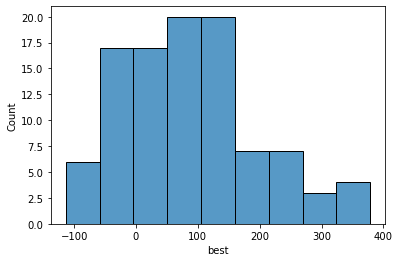

In [8]:
sns.histplot(df.best)

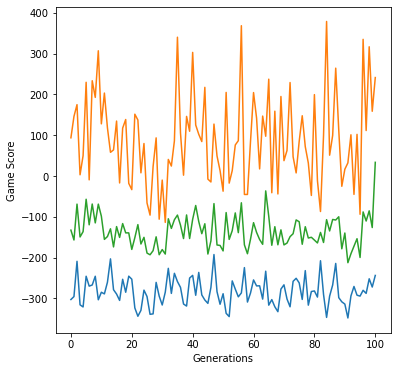

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.lineplot(x='generations', y='worst', data=df)
sns.lineplot(x='generations', y='best', data=df)
sns.lineplot(x='generations', y='mean', data=df)
ax.set(ylabel='Game Score', xlabel='Generations')
plt.show()

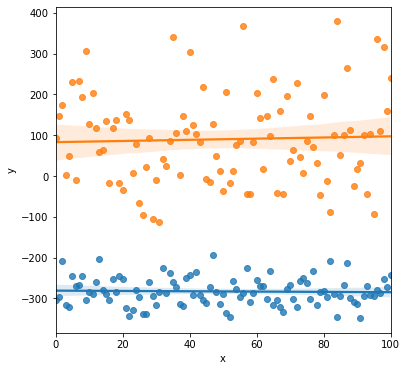

In [10]:

# create the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.regplot(x='generations', y='worst', data=df, fit_reg=True)
sns.regplot(x='generations', y='best', data=df, fit_reg=True)
ax.set(ylabel='y', xlabel='x')
plt.show()

In [11]:
df.to_csv('100_geracoes_small_mutation.csv')